In [121]:
# Imports and dependencies
import yfinance as yf
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [122]:
# Grab multiple ticker data: Tesla, Microsoft, Apple

# Set variables for parameters
tickers = 'TSLA MSFT AAPL'
period = '60d'
interval = '5m'
group_by = 'ticker'
auto_adjust = True

# Download data
data = yf.download(tickers=tickers, period=period, interval=interval, group_by=group_by, auto_adjust=auto_adjust)

[*********************100%***********************]  3 of 3 completed


In [123]:

data_list = [data[col] for col in tickers.split(' ')]
new_data = []
for df in data_list:
    df['price'] = (df.Open + df.Close)/2
    tdf = df.pct_change().iloc[1:]*1000
    new_data.append(tdf[((tdf.index.minute != 30) & (tdf.index.hour == 9)) | (tdf.index.hour != 9)]) # yield for larger data sets; turn into function before using yield
    # Delete  inter-day data point (where datetime == 09:30)
# tdf[((tdf.index.minute != 30) & (tdf.index.hour == 9)) | (tdf.index.hour != 9)]

pc_dict = dict(zip(tickers.split(' '), new_data))
raw_dict = dict(zip(tickers.split(' '), data_list))

pc_dict['AAPL']

C:\Users\BONETH~1.AHA\AppData\Local\Temp/ipykernel_29624/3641399516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = (df.Open + df.Close)/2


,Open,High,Low,Close,Volume,price
Datetime,,,,,,
2021-08-27 09:35:00-04:00,-0.339050,-1.487802,0.000000,-2.374830,-570.741515,-1.356733
2021-08-27 09:40:00-04:00,-2.509633,-2.717852,-1.270390,0.475910,46.753871,-1.018686
2021-08-27 09:45:00-04:00,0.544008,0.144662,0.114399,-1.835016,36.754316,-0.645827
2021-08-27 09:50:00-04:00,-1.868927,-1.561832,-0.272304,0.243837,-288.986285,-0.813515
2021-08-27 09:55:00-04:00,0.374444,0.952118,0.272378,1.866401,-21.675406,1.120526
...,...,...,...,...,...,...
2021-11-19 15:35:00-05:00,0.311584,1.930607,0.592148,2.101768,640.069084,1.206823
2021-11-19 15:40:00-05:00,2.103703,0.870210,1.869399,0.155462,285.570821,1.128552
2021-11-19 15:45:00-05:00,0.169692,-0.621079,-1.306337,-0.963354,-40.318279,-0.396879


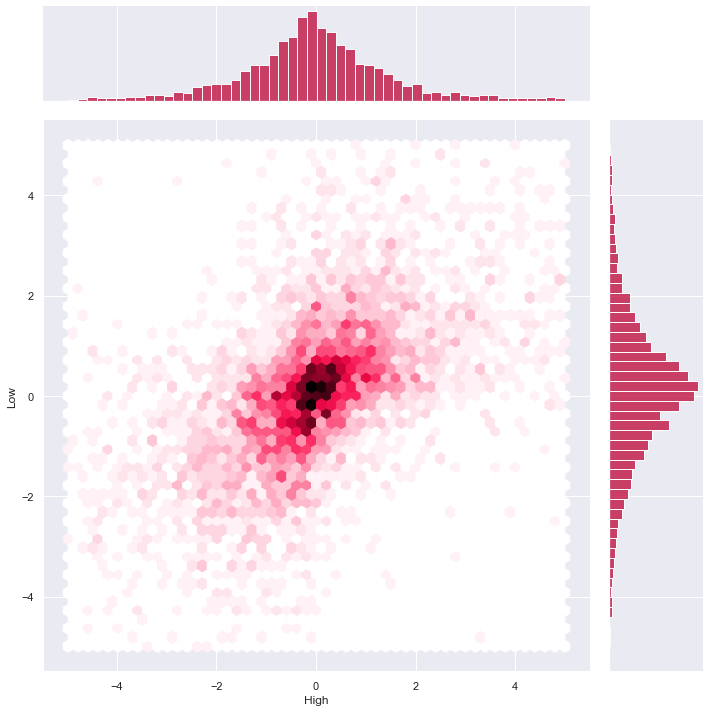

In [124]:
# Plot data with seaborn

# Tesla plot dimensions
tsla_df = pc_dict['TSLA']

# Filter high and low
col_1 = 'High'
col_2 = 'Low'

plot_tsla = tsla_df[(tsla_df[col_1].abs() <= 5) & (tsla_df[col_2].abs() <= 5)]

x = plot_tsla.High
y = plot_tsla.Low

# Plot tickers
sns.jointplot(x=x, y=y, kind='hex', color='#BF0436', height= 10)

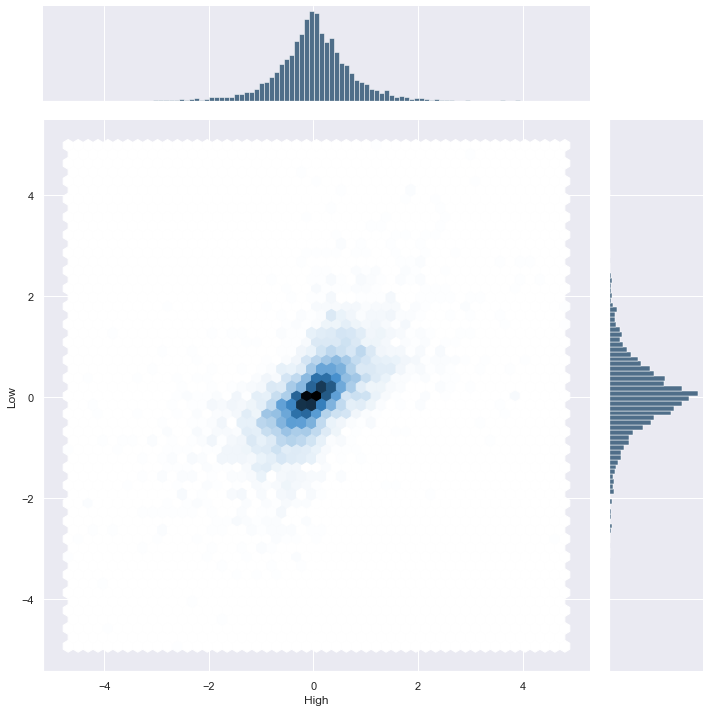

In [139]:
# Microsoft plot dimensions
msft_df = pc_dict['MSFT']

# Filter high and low
col_1 = 'High'
col_2 = 'Low'

plot_msft = msft_df[(msft_df[col_1].abs() <= 5) & (msft_df[col_2].abs() <= 5)]

x = plot_msft.High
y = plot_msft.Low

sns.jointplot(x=x, y=y, kind='hex', color='#1B4466', height= 10)

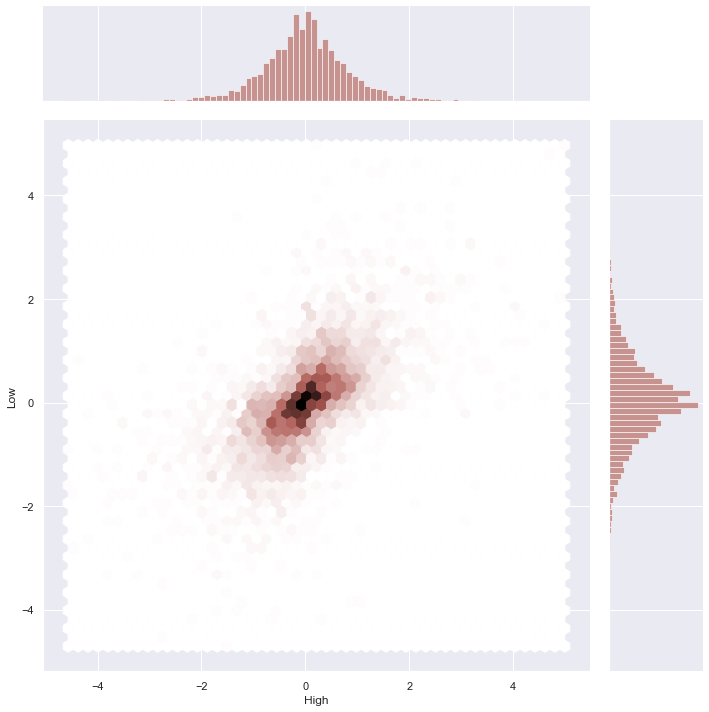

In [144]:
# Apple plot dimensions
aapl_df = pc_dict['AAPL']

# Filter high and low
col_1 = 'High'
col_2 = 'Low'

plot_aapl = aapl_df[(aapl_df[col_1].abs() <= 5) & (aapl_df[col_2].abs() <= 5)]

x = plot_aapl.High
y = plot_aapl.Low

sns.jointplot(x=x, y=y, kind='hex', color='#BC7671', height= 10)

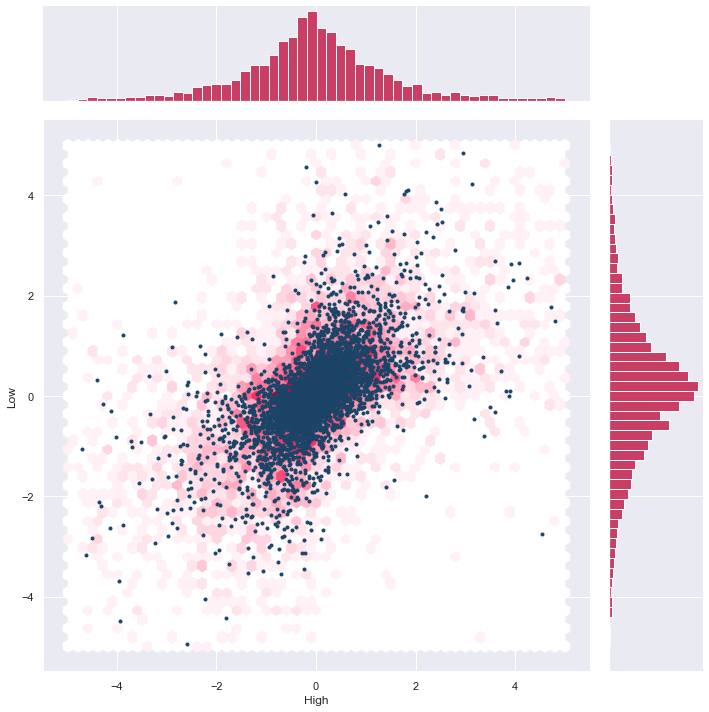

In [145]:
# Combine graphs: Tesla and Microsoft

graph = sns.jointplot(x=plot_tsla.High, y=plot_tsla.Low, kind='hex', color='#BF0436', height= 10)

graph.x = plot_msft.High
graph.y = plot_msft.Low
tsmt = graph.plot_joint(plt.scatter, marker = '.', color='#1B4466')

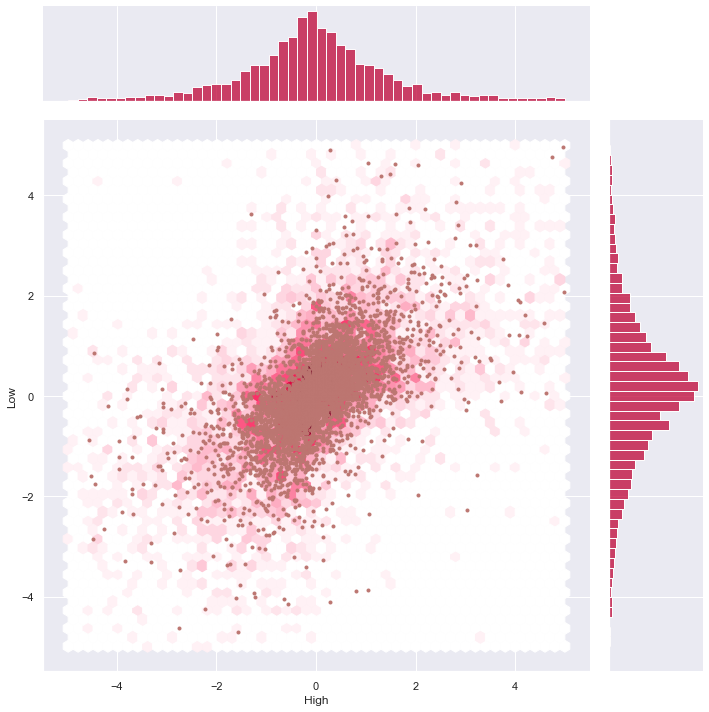

In [146]:
# Combine graphs: Tesla and Apple

graph = sns.jointplot(x=plot_tsla.High, y=plot_tsla.Low, kind='hex', color='#BF0436', height= 10)

graph.x = plot_aapl.High
graph.y = plot_aapl.Low
tsap = graph.plot_joint(plt.scatter, marker = '.', color='#BC7671')

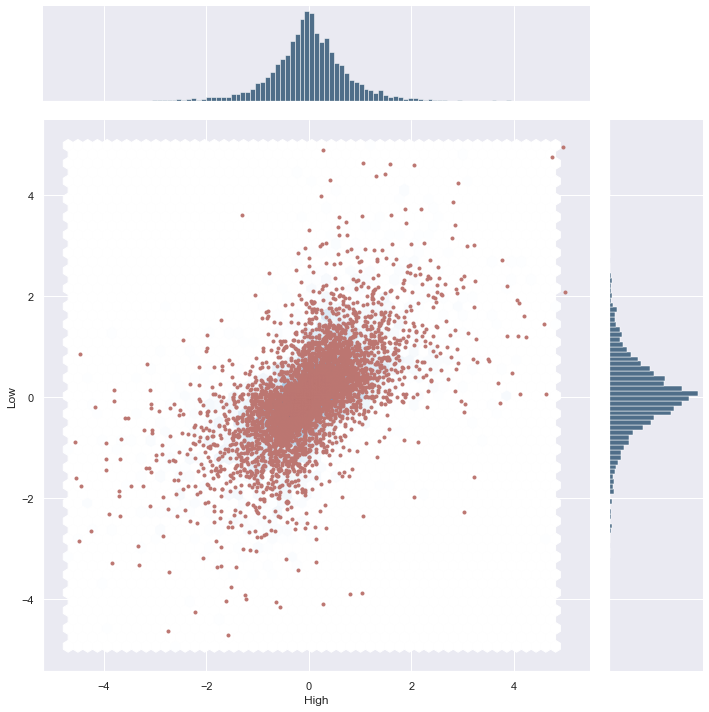

In [148]:
# Combine graphs: Microsoft and Apple

graph = sns.jointplot(x=plot_msft.High, y=plot_msft.Low, kind='hex', color='#1B4466', height= 10)

graph.x = plot_aapl.High
graph.y = plot_aapl.Low
mtap = graph.plot_joint(plt.scatter, marker = '.', color='#BC7671')